<a href="https://colab.research.google.com/drive/10pRfCywNHgxorxw7EJIsy0aid_9_Twes#scrollTo=xLl2lqTfFZyB" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MRI classification on morphometry data**

#### 1. Introduction

In this notebook we will do conventional morphometry analysis for gender-related morphometric sighns search.


**Our goal will be to build a network for MEN and WOMEN brain classification, to explore gender influence on brain structure and find gender-specific biomarkers.**

We will use the data from https://db.humanconnectome.org/data/projects/HCP_1200.

*Proceeding with this Notebook you confirm your personal acess [to the data](https://www.humanconnectome.org/study/hcp-young-adult/document/1200-subjects-data-release).
 And your agreement on data [terms and conditions](https://www.humanconnectome.org/study/hcp-young-adult/data-use-terms).*


#### 2. Mounting Google Drive to Collab Notebook. You should go with the link and enter your personal authorization code:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**!!! Add a shortcut** with "Add a shortcut" with the `data` repository from here https://drive.google.com/drive/folders/1GCIXnK6ly5l_LADanpLmvtZ6YbqPUamQ?usp=sharing

After adding a shotcut change this data dir to yours own files location in Google drive and give a path to `seminars/anat` folder:

In [ ]:
data_dir = '/content/drive/MyDrive/anat/'

In [ ]:
!cd /content/drive && ls

MyDrive


### Importing the data

Importing `unrestricted_freesurfer.csv` dataset from https://db.humanconnectome.org/data/projects/HCP_1200.

In [ ]:
import pandas as pd
data = pd.read_csv(data_dir + 'unrestricted_hcp_freesurfer.csv')

In [ ]:
data.head()

,Subject,Gender,Release,FS_InterCranial_Vol,FS_BrainSeg_Vol,FS_BrainSeg_Vol_No_Vent,FS_BrainSeg_Vol_No_Vent_Surf,FS_LCort_GM_Vol,FS_RCort_GM_Vol,FS_TotCort_GM_Vol,...,FS_R_Rostralanteriorcingulate_CurvInd,FS_R_Rostralmiddlefrontal_CurvInd,FS_R_Superiorfrontal_CurvInd,FS_R_Superiorparietal_CurvInd,FS_R_Superiortemporal_CurvInd,FS_R_Supramarginal_CurvInd,FS_R_Frontalpole_CurvInd,FS_R_Temporalpole_CurvInd,FS_R_Transversetemporal_CurvInd,FS_R_Insula_CurvInd
0,100206,M,S900,1.864518e+06,1406924.0,1389007.0,1.386836e+06,304488,305634,610122,...,5.6,34.6,40.1,23.3,15.6,11.9,2.9,3.8,2.8,37.5
1,100307,F,Q1,1.512540e+06,1109710.0,1098854.0,1.097122e+06,240030,243207,483238,...,3.3,29.9,48.8,21.6,18.6,15.0,2.9,5.8,2.0,30.2
2,100408,M,Q3,1.684117e+06,1280171.0,1260943.0,1.259250e+06,260695,265243,525938,...,3.3,25.2,27.5,15.2,13.9,12.3,1.8,7.8,1.9,25.1
3,100610,M,S900,1.816044e+06,1321362.0,1306929.0,1.304569e+06,276506,278002,554508,...,3.0,19.6,20.0,18.6,10.6,10.8,1.2,4.1,1.4,16.6
4,101006,F,S500,1.437868e+06,1053766.0,1038408.0,1.037793e+06,203718,210539,414257,...,2.9,14.7,21.3,13.2,8.7,9.8,1.1,3.0,1.0,18.9


**How to get this morpometry data inhouse?**

1. You should have T1 weighted MRI, or T1 with T2.
2. Should have patients data in `BIDS` or converted in `*.nii`.
3. Run `fsdocker` or standalon installed `freesurfer 6.0`.
4. Wait 5-11 hours on 1 CPU per patient.
5. Get freesurfer stats as output and convert them in table format.


The tutorial and data for table creation as well as data visualisation can be found here:
https://github.com/kondratevakate/your-brain-mri-visualization

### Defining the train and test data

In is a set of brain morphometry measures of healthy young adults. On the data we have two classification plobles to solve:
- men/women classification.
- age above 30n classification.

Choose your X (train_data) and y (train_targets) as `pandas.DataFrame()` or  `numpy.array()`:

In [ ]:
X = data[data.columns[3:]]
y = data[data.columns[1]]
X.shape, y.shape

((1113, 935), (1113,))

In [ ]:
y.value_counts()

F    606
M    507
Name: Gender, dtype: int64

Let's change `str` values to binary classes. The easy but BAD way is:

In [ ]:
y[y == 'F'] = 1
y[y == 'M'] = 0
y = y.astype(int)
y.value_counts()

<ipython-input-8-85e2ccdd8f7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 'F'] = 1
<ipython-input-8-85e2ccdd8f7f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 'M'] = 0


1    606
0    507
Name: Gender, dtype: int64

### Let's do classical data analysis

**Statistics**:
1. Pick up a test for two grups comparison (gaussian/ parametric or not?)
2. Is it paired test or not?
3. Choose a p-value and address the multiple comparisons.


What about feature selection?

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [ ]:
from sklearn.feature_selection import SelectKBest
X_new = SelectKBest(k=10).fit_transform(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 55  56  57  58  98  99 100 101 174 175 176 177 178 179 180 181 293 294
 295 296 297 298 299 300 301 302 303 304] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [ ]:
X.columns[SelectKBest(k=10).fit(X, y).get_support()]

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 55  56  57  58  98  99 100 101 174 175 176 177 178 179 180 181 293 294
 295 296 297 298 299 300 301 302 303 304] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Index(['FS_InterCranial_Vol', 'FS_BrainSeg_Vol', 'FS_BrainSeg_Vol_No_Vent',
       'FS_BrainSeg_Vol_No_Vent_Surf', 'FS_RCort_GM_Vol', 'FS_Total_GM_Vol',
       'FS_SupraTentorial_Vol', 'FS_SupraTentorial_Vol_No_Vent',
       'FS_SupraTentorial_No_Vent_Voxel_Count', 'FS_Mask_Vol'],
      dtype='object')

In [ ]:
SelectKBest(k=10).fit(X, y).pvalues_[SelectKBest(k=10).fit(X, y).get_support()]

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 55  56  57  58  98  99 100 101 174 175 176 177 178 179 180 181 293 294
 295 296 297 298 299 300 301 302 303 304] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 55  56  57  58  98  99 100 101 174 175 176 177 178 179 180 181 293 294
 295 296 297 298 299 300 301 302 303 304] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


array([1.94994980e-119, 1.05378836e-132, 2.10947028e-130, 1.82438130e-130,
       1.97890774e-115, 1.57062960e-131, 1.02216503e-123, 1.21904593e-121,
       1.66388625e-121, 2.09748304e-155])

What do you know about multiple comparisons?


![graph](https://janhove.github.io/figs/2016-04-01-multiple-comparisons-scenarios/unnamed-chunk-1-1.png)

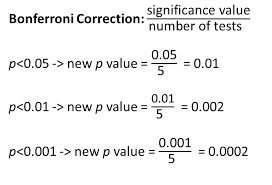

One bad paper to look at:
https://arxiv.org/pdf/1604.05992.pdf

And one good paper:
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3056175/

## Now we are doing ML!
#### Defining model grid search. Defining new object of Grid Cross Validation Linear class:

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
# will run for 1-2 minutes
lr_cv = LogisticRegressionCV(max_iter = 1000, random_state = 42, n_jobs = -1)
lr_cv.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegressionCV(max_iter=1000, n_jobs=-1, random_state=42)

In [ ]:
lr_cv.scores_

{1: array([[0.76233184, 0.78923767, 0.79372197, 0.80717489, 0.78923767,
         0.8161435 , 0.79820628, 0.8161435 , 0.80717489, 0.8161435 ],
        [0.75336323, 0.76681614, 0.78475336, 0.78475336, 0.79820628,
         0.79372197, 0.78475336, 0.78026906, 0.78475336, 0.78026906],
        [0.78923767, 0.83408072, 0.86547085, 0.85201794, 0.83856502,
         0.83856502, 0.84304933, 0.84304933, 0.83856502, 0.83408072],
        [0.78378378, 0.80630631, 0.7972973 , 0.81981982, 0.81081081,
         0.82432432, 0.81531532, 0.82432432, 0.81531532, 0.82432432],
        [0.83333333, 0.81081081, 0.82882883, 0.81531532, 0.82432432,
         0.82882883, 0.84234234, 0.82882883, 0.82432432, 0.81981982]])}

## What else?

0. Hyperparameter search and model optimisation. Comparison of model performance with statistical testing.
1. Model interpretation
2. Biomarkers stability
3. Biomarkers statistical approval

How we can explore the found morphometry biomarkers from here?

In [ ]:
lr_cv.coef_

array([[-1.45840674e-07, -3.26367653e-04,  9.57976953e-05,
        -1.15047707e-03, -4.10459856e-04, -1.48588139e-04,
        -5.65467264e-04, -1.69973805e-04,  1.88786935e-03,
         3.28573138e-05, -4.15561250e-04,  1.04856549e-03,
         1.68288351e-04,  2.75450722e-04,  4.43826492e-04,
        -1.59589310e-05,  5.20750706e-06,  7.28813618e-06,
         5.90234662e-05,  7.41159091e-05,  1.33139375e-04,
         7.90422898e-05,  1.43283354e-03,  7.59293256e-04,
        -1.48390341e-04, -2.63502843e-04,  1.87396319e-04,
        -3.08692654e-04, -6.03758108e-04,  9.80553372e-05,
         2.54246047e-04,  1.25931619e-04, -4.06059273e-04,
        -2.60622799e-03, -8.03605586e-04, -1.37553947e-03,
        -1.09515564e-03, -2.64301420e-04, -7.31552924e-04,
         2.31192460e-04, -5.05670684e-04,  5.44769693e-04,
        -3.81340881e-04, -1.09398291e-04, -5.55138241e-04,
        -6.90809171e-04, -8.91877373e-05,  1.35645502e-04,
        -1.39743087e-03, -1.22254897e-03, -2.74766623e-0

How do we compare the performance of **two classificational models**?

Nice work with recommendations on models comparison: https://arxiv.org/pdf/1806.08295.pdf